<center>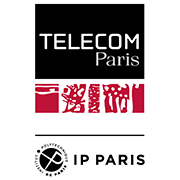</center>

------------------------

<br />

<h1><center><strong><font color="chillipepper"> Fouille de données </font></strong></center></h1>
<h1><center><font color="blue"><strong> Mastère spécialisé : Big Data & IA </strong></font></center></h1>
<h3><center><font color="red"><strong> TP : K-NN, LDA et Regression Logistique </strong></font></center></h3>

<h3><center><font color="blue"><strong> 
      MAHAMAT ATTEÏB Adoum
</strong></font></center></h3>


<br />

------------------------


In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split    # subvisier les données en 2 
from sklearn.neighbors import KNeighborsClassifier      #  K-NN
from sklearn import neighbors, model_selection          #  K-NN
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits                # importation donnee "digits"
from sklearn import datasets                            # importation d'une dataset
from sklearn import metrics                             # matrice de confusion
from sklearn.metrics import accuracy_score              # calcul du score
from collections import Counter
from matplotlib import cm                               # confusion matrix
from sklearn import linear_model
from sklearn import model_selection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools             # intervient dans l'affichage de la matrice de confusion
import tp_knn_source         # importer les fonctions

Dans le cadre de ce projet, nous utilisons trois techniques de Machine Learning à savoir :

    - Les K-plus proches voisins (K-NN) 
    - L'Analyse discriminante lineaire (LDA)
    - La regression logistique 
    
sur des données simulées et les données digits disponibles dans scikit learn.\
Nous étudierons également la performance de ces différents modèles.

## Question 1 : Génération artificielle des données

Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers. Que renvoient
ces fonctions ? À quoi correspond la dernière colonne ?

**Appel de la fonction 'rand_bi_gauss'**

**rand_bi_gauss** génère deux ensembles de points (n1 et n2) à partir de deux distributions gaussiennes différentes. $\mu_1$, $\mu_2$, $\sigma_1$, et $\sigma_2$ spécifient les moyennes et écarts-types pour chaque distribution.

Les points sont étiquetés avec 1 pour la première distribution et -1 pour la seconde. 

In [2]:
X_donnee1, Y_donnee1 = tp_knn_source.rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])

**Appel de la fonction 'rand_tri_gauss'**

**rand_tri_gauss** est une extension de la fonction précédente (rand_bi_gauss) et est conçue pour générer un ensemble de données à partir de 3 distributions gaussiennes bidimensionnelles différentes. $n_1$, $n_2$, et $n_3$ sont les nombres de points, $\mu_1$, $\mu_2$, $\mu_3$, $\sigma_1$, $\sigma_2$, et $\sigma_3$ sont les moyennes et écarts-types.

Dans ce cas précis, chaque échantillon généré comporte 50 observations. On a deux variables indépendantes et 1 variable dépendante Y qui a 3 classes : 1, 2 et 3.

In [3]:
X_donnee2, Y_donnee2  = tp_knn_source.rand_tri_gauss(n1=50, n2=50, n3=50, mu1=[1, 1],
                   mu2=[-1, -1], mu3=[1, -1], sigma1=[0.9, 0.9],
                   sigma2=[0.9, 0.9], sigma3=[0.9, 0.9])

**Appel de la fonction 'rand_clown'**

**rand_clown** génère un ensemble de données avec deux classes distinctes.
La première classe est générée en fonction de $x_0$ et $x_1$, où $x_1$ dépend quadratiquement de $x_0$.

La seconde classe est générée aléatoirement avec un écart-type $\sigma2$.
Les points sont étiquetés avec 1 pour la première classe et -1 pour la seconde, puis mélangés.

In [4]:
X_donnee3, Y_donnee3 = tp_knn_source.rand_clown(n1=50, n2=50, sigma1=1, sigma2=5)

**Appel de la fonction 'rand_checkers'**

**rand_checkers** crée un ensemble de données en forme de damier.
$n_1$ et $n_2$ sont les nombres de points dans les "cases" positives et négatives du damier, respectivement.
sigma est l'écart-type du bruit ajouté aux points.
Les points sont étiquetés en fonction de leur position dans le damier et mélangés avant d'être retournés.

In [5]:
X_donnee4, Y_donnee4   = tp_knn_source.rand_checkers(n1=150, n2=150, sigma=0.1)

**En résumé**

In [6]:
print("rand_bi_gauss génére des données avec 2 classes : ", np.unique(Y_donnee1))
print("rand_tri_gauss génére des données avec 3 classes : ", np.unique(Y_donnee2))
print("rand_clown génére des données avec 2 classes : ", np.unique(Y_donnee3))
print("rand_checkers génére des données avec 3 classes : ", np.unique(Y_donnee4))

rand_bi_gauss génére des données avec 2 classes :  [-1.  1.]
rand_tri_gauss génére des données avec 3 classes :  [1. 2. 3.]
rand_clown génére des données avec 2 classes :  [-1.  1.]
rand_checkers génére des données avec 3 classes :  [1. 2. 3.]


## Question 2 : Graphique des données simulées

On utilise la fonction plot_2d du fichier tp_knn_source pour tracer la représentation graphique des 4 données générées.

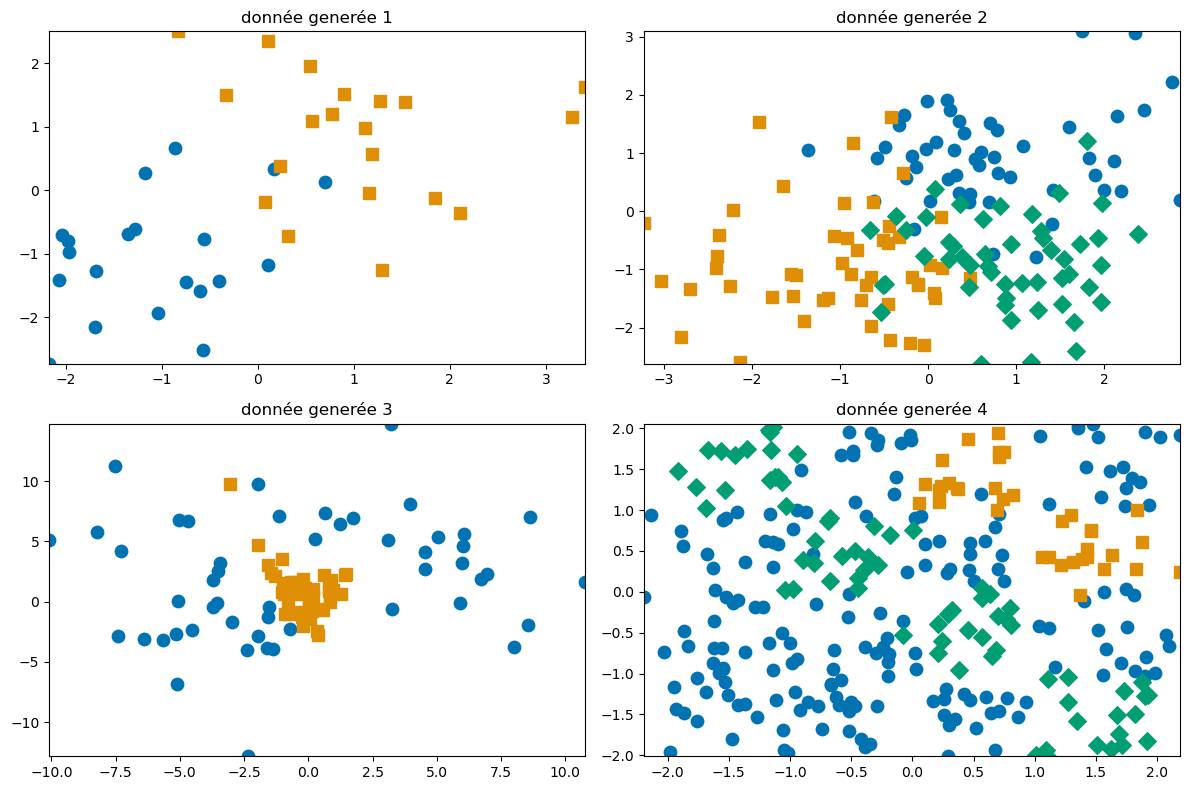

In [7]:
datasets = [(X_donnee1, Y_donnee1), (X_donnee2, Y_donnee2), 
            (X_donnee3, Y_donnee3), (X_donnee4, Y_donnee4)]

titles = ["donnée generée 1", "donnée generée 2", "donnée generée 3", "donnée generée 4"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    # axes.flatten() transforme la matrice 2D des axes en un tableau 1D, 
    # permettant de parcourir les axes dans un ordre linéaire (de gauche à droite 
    #et de haut en bas)
    X, Y = datasets[i]
    plt.sca(ax)  # Définir l'axe courant sur 'ax'
    ax.set_title(titles[i])
    tp_knn_source.plot_2d(X, Y, alpha_choice=1)
plt.tight_layout()
plt.show()

# I. k-plus proches voisins

## Question 3 : Et si $y$ est dans $\mathbb{R}$ ?

Pour adapter cette méthode du K-NN dans le cas oû  la variable target est continue (réelle), on suit les étapes ci-dessous :
* Trouver les $k$ plus proches voisins du nouveau point $x$ dans l'ensemble d'apprentissage
* Calculer la moyenne des valeurs de $y$ de ces $k$ voisins
* Utiliser cette moyenne comme la prédiction de la valeur pour le nouveau point $x$.

La fonction de prédiction peut donc être formalisée comme suit :
$$
\hat{y}(x) = \frac{1}{k} \sum_{x_i \in V_k(x)} y_i
$$
où $V_k(x)$ est l'ensemble des $k$ plus proches voisins de $x$, et $y_i$ sont les valeurs de la variable cible associées à ces voisins dans l'ensemble d'apprentissage.


## Question 4 : Implémentation de 'KNNClassifier'

On implémente une classe 'KNNClassifier' en faisant appel à deux fonctions "BaseEstimator" et "ClassifierMixin".

KNNClassifier qu'on a implémenté suit le principe standard de k-NN où pour chaque point à prédire, les étiquettes des k plus proches voisins sont utilisées pour déterminer l'étiquette la plus probable. **En cas d'ex-aequo**, l'étiquette qui apparaît en premier parmi les voisins est choisie, ce qui peut dépendre de l'ordre des points dans le jeu d'entraînement.

In [8]:
class KNNClassifier(BaseEstimator, ClassifierMixin):
    # CONSTRUCTEUR 
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    # METHODE : données train et test
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    # METHODE : prédiction
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    # METHODE 
    def _predict(self, x):
        # Calculer les distances entre x et tous les exemples dans le jeu d'entraînement
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        
        # Obtenir les k plus proches voisins et leurs étiquettes
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Voter pour la classe la plus commune
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

On teste notre classe avec les donnees X_donnee2, Y_donnee2. On subdivise ces données en deux, les observations d'indice pair pour l'entrainement et ceux d'indice impair pour le test.

**Subdivision des données en deux : train et test**

In [9]:
X_train2 = X_donnee2[::2]
Y_train2 = Y_donnee2[::2].astype(int)
X_test2 = X_donnee2[1::2]
Y_test2 = Y_donnee2[1::2].astype(int)

**Instanciation et entrainement du modèle**

In [10]:
# On fait appel à notre classe qui utilise les KNN.
knn = KNNClassifier(n_neighbors = 5)

# On entraine le modèle de knn 
knn.fit(X_train2, Y_train2)
# Prediction sur les donnees X_train2

KNNClassifier(n_neighbors=5)

**Prediction sur les donnees X_test2 et accuracy**

On fait la prédiction de notre modèle sur les données X_test2.

In [11]:
# prédiction
Y_pred2 = knn.predict(X_test2)
# Calcul du accuracy
accuracy = accuracy_score(Y_test2, Y_pred2)
print(f"Le score de notre classifieur k-NN est : {accuracy * 100:.2f}%")

Le score de notre classifieur k-NN est : 77.33%


## Question 5 : Mise en oeuvre de la classe 'KNNClassifier'

On entraine l'algorithme KNeighborsClassifier implémenté sur les 4 données simulées en fixant $k=5$. On utilise la distance euclidienne.

In [12]:
# Itération sur chaque ensemble de données
for i, (X, Y) in enumerate(datasets, start=1):
    # Instanciation du modèle
    model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    # Entraînement du modèle
    model.fit(X, Y)
    # Prédiction sur les données X
    Y_pred = model.predict(X)
    # Calcul de l'exactitude (accuracy)
    accuracy = accuracy_score(Y, Y_pred)
    print(f"Le score du classifieur k-NN sur les données {i} est : {accuracy * 100:.2f}%")

Le score du classifieur k-NN sur les données 1 est : 92.50%
Le score du classifieur k-NN sur les données 2 est : 83.33%
Le score du classifieur k-NN sur les données 3 est : 95.00%
Le score du classifieur k-NN sur les données 4 est : 92.01%


In [13]:
def ff(X):
    return model.predict(X.reshape(1, -1))

C:\Users\PC\AppData\Local\Temp\ipykernel_19292\3242814208.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


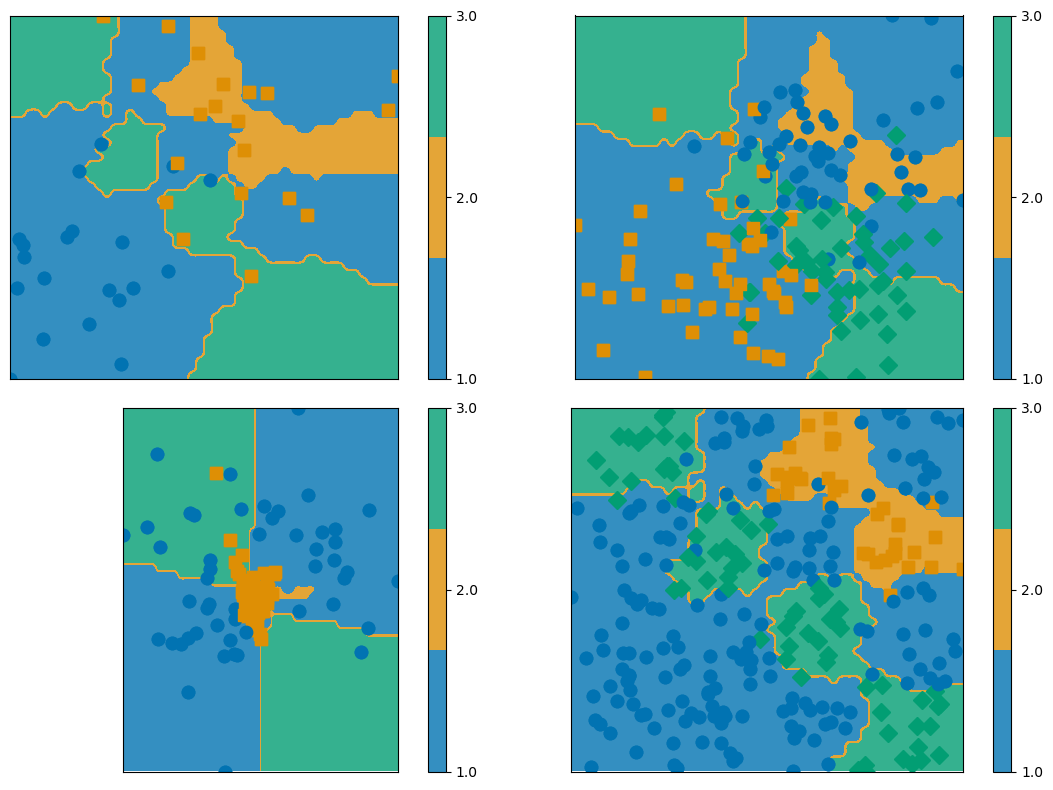

In [14]:
plt.subplots(figsize=(12, 8))
# Itération sur chaque paire de données et leur index
for i, (X, Y) in enumerate(datasets, start=1):
    plt.subplot(2, 2, i)
    tp_knn_source.plot_2d(X, Y, alpha_choice=1)  
    tp_knn_source.frontiere_new(ff, X, Y) 

plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

**En bas à droite :** On constate que ce graphique présente une séparation claire entre les régions de différentes classes avec des frontières de décision qui semblent suivre une forme géométrique ou un motif. Les différentes couleurs (bleu, vert et orange) indiquent les régions où l'algorithme de K-NN a classé les points dans différentes classes.

## Question 6 : Faisons varier l'hyperparamètre $k$

Commençons par représenter graphiquement les observations d'indice pair avant de l'entraîner sur différentes valeurs de $k$. 

**Représentation graphique des données 2**

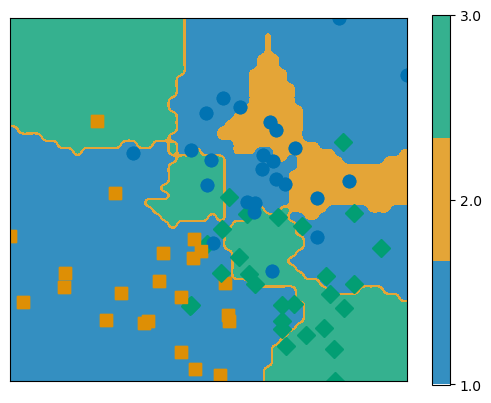

In [15]:
tp_knn_source.plot_2d(X_donnee2[::2], Y_donnee2[::2], alpha_choice=1)
tp_knn_source.frontiere_new(ff, X_donnee2[::2], Y_donnee2[::2])

**K-NN sur les train de données 2 avec différentes valeurs de k**

On entraîne le modèle sur les données train de données 2.

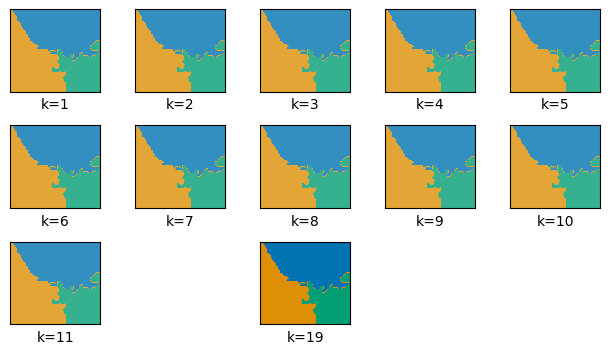

In [16]:
error_rate =[]

# entrainement du K-NN avec k allant de 1 à 19
for i in range(1,20):
    knn = KNNClassifier(n_neighbors = i)
    model.fit(X_train2, Y_train2)
    if i > 11:
        plt.subplot(4, 5, 18)
    else:
        plt.subplot(4, 5, 5 + i)
    plt.xlabel('k=%d' % i)
    
    tp_knn_source.frontiere_new(ff, X_donnee2[::2], Y_donnee2[::2], 
                                w=None, step=50, alpha_choice=1, colorbar=False, samples=False)
    plt.draw()
plt.tight_layout()

$k=1 :$ Chaque point de données est classé selon son voisin le plus proche. Cela conduit souvent à une frontière de décision très complexe et peut-être trop ajustée (overfitting), car elle est fortement influencée par le bruit ou les valeurs aberrantes dans les données.

$k=2 \  \text{à} \ k=10 :$ À mesure que k augmente, les frontières deviennent plus lisses et moins complexes. Cela suggère que l'algorithme commence à généraliser mieux, en ignorant le bruit et en se concentrant sur les tendances plus larges des données. Cela est dû à la nature de K-NN, où augmenter k signifie que chaque point est classé par un vote majoritaire parmi ses k voisins, ce qui a tendance à lisser les effets des valeurs aberrantes.

$k=11 \ \text{et} \ k=19 :$ À des valeurs encore plus élevées de k, les frontières de décision commencent à montrer des signes de sous-ajustement (underfitting). Les classes semblent être sur-généralisées, ce qui peut conduire à des erreurs de classification, en particulier dans les zones où les données de différentes classes se chevauchent.

## Question 7 : Pondération du voisin $j$

On modifie l'implémentation de l'algorithme K-NN dans Scikit-learn en changeant "le poids des observations" avec la formule ci-dessous.

$$\hat{f}_k(x) \in \underset{y \in V}{\arg\max} \sum_{j=1}^{k} \exp \left(-\frac{d_j^2}{h}\right) \mathbb{1}_{\{y_{tr_j} = y\}}$$


In [17]:
def weights(dist):
    return np.exp(-dist ** 2 / 0.1)

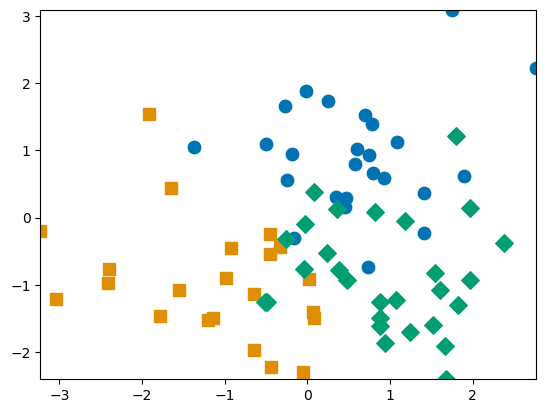

In [18]:
n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(X_donnee2[::2], Y_donnee2[::2].astype(int))
plt.figure(4)
tp_knn_source.plot_2d(X_donnee2[::2], Y_donnee2[::2])

Pour tester l’impact du choix de $h$ sur les frontières de classification,
visualisez les règles de classification pour $k = 7$ et $h = 10^j$ avec $j = −2,−1, 0, 1, 2$.

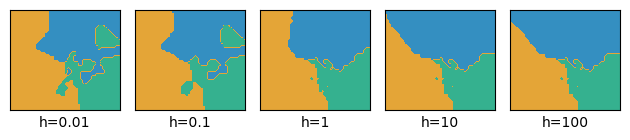

In [19]:
n_neighbors = 7
for j in range(-2,3):
    # On modifie le poids des observations dans l'implémentation de scikit-learn
    def weights_parametre(dist):
        return np.exp(-dist ** 2 / (10**j))
    
    # On instancie le modèle
    knn_parametre = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_parametre)
    # On entraine le modèle
    knn_parametre.fit(X_donnee2[::2], Y_donnee2[::2])
    # On trace les 5 figures
    plt.subplot(1, 5, j + 3)
    plt.xlabel('h={}'.format(10 ** j))
    def f(xx):
        """Classifier: needed to avoid warning due to shape issues"""
        return knn_parametre.predict(xx.reshape(1, -1))
    tp_knn_source.frontiere_new(f, X_donnee2[::2], Y_donnee2[::2], w=None, step=50, alpha_choice=1,
                  colorbar=False, samples=False)
    plt.draw() # update plot
    plt.tight_layout()

Interprétation des résultats :\
$Cas \ 1$ : $j=-2$, $h = 10^{-2} = 0.01$ : Avec un $ℎ$ très petit, les poids des voisins diminuent très rapidement avec la distance. Cela signifie que seuls les voisins très proches ont une influence significative sur la prédiction. En conséquence, la frontière de décision est très détaillée et s'adapte étroitement autour des données d'entraînement, ce qui pourrait indiquer un surajustement (overfitting), où le modèle est très sensible au bruit dans les données d'entraînement.

$Cas \ 2$ : $j=-1$, $h = 10^{-1} = 0.1$ : En augmentant légèrement $ℎ$, les poids des voisins diminuent moins rapidement, ce qui donne plus d'influence aux voisins éloignés et produit des frontières de décision plus lisses par rapport à 
$ℎ=0.01$ mais toujours potentiellement complexes et susceptibles de surajuster.

$Cas \ 3$ : $j=0$, $h = 10^{0} = 1$ : C'est un compromis entre les voisins proches et éloignés qui influencent la prédiction. Les frontières de décision sont plus régulières et cela pourrait indiquer un bon équilibre entre biais et variance, minimisant à la fois le surajustement et le sous-ajustement.\
\
$Cas \ 4$ : $j=1$, $h = 10^{1} = 10$ : Les poids décroissent lentement avec la distance, ce qui permet aux voisins plus éloignés d'influencer la prédiction. Les frontières deviennent encore plus lisses et cela pourrait signifier que le modèle commence à sous-ajuster les données, ne capturant pas toutes les subtilités de la structure des données.

$Cas \ 4$ : $j=2$, $h = 10^{2} = 100$ : Quand h est très grand, pratiquement tous les voisins, indépendamment de leur distance, ont une influence similaire sur la prédiction. Cela mène à des frontières très simples et lisses qui pourraient ne pas capturer les variations significatives dans les données, ce qui est un signe de sous-ajustement (underfitting).

En conclusion, Un $h$ plus petit donne un modèle plus flexible mais potentiellement surajusté, tandis qu'un $h$ plus grand conduit à un modèle moins flexible et potentiellement sous-ajusté.

## Question 8 : Taux d'erreur $k=1$

Quel est le taux d’erreur sur les mêmes données d’apprentissage (i.e., la proportion d’erreur faite par le classifieur) lorsque k = 1 ? et sur des données de test (les observations d’indice pair) ?

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2, Y_train2)
# Prediction sur les donnees test
print("Le score sur les données train est :", 1 - knn.score(X_train2, Y_train2))
print("Le score sur les données test est :", 1 - round(knn.score(X_test2, Y_test2),2))

Le score sur les données train est : 0.0
Le score sur les données test est : 0.35


L'erreur commise sur les données test est nettement plus élevé que les données train.

## Question 9 : Courbe du taux d'erreur, k allant de 1 à 50

On visualise l'évolution de l'erreur de classification en fonction de l'hyperparamètre $k$.

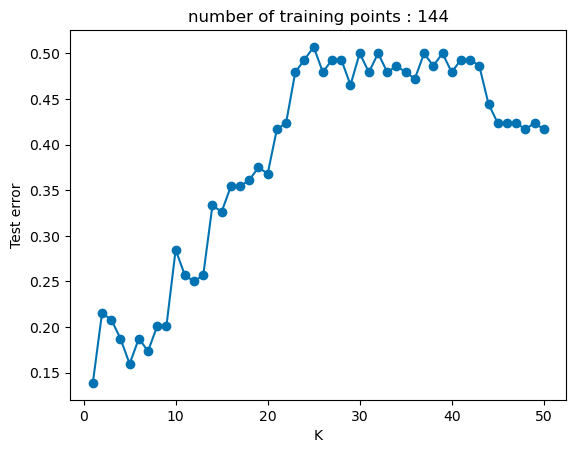

In [21]:
X_train4 = X_donnee4[::2]
Y_train4 = Y_donnee4[::2].astype(int)
X_test4 = X_donnee4[1::2]
Y_test4 = Y_donnee4[1::2].astype(int)

# Prepare the plot
error_curve = tp_knn_source.ErrorCurve(k_range=range(1, 51))   # k allant de 1 à 50
error_curve.fit_curve(X_train4, Y_train4, X_test4, Y_test4)
plt.figure(5)
error_curve.plot()

Sur l'axe des abscisses, nous avons l'hyperparamètre $k$ et sur les ordonnées, l'erreur commise.

Lorsque k est très petit (proche de 1), l'erreur de test est relativement faible, ce qui suggère que le modèle est très flexible et capture bien les détails des données d'entraînement. Cependant, cela peut aussi être un signe de surajustement (overfitting), où le modèle est trop spécialisé sur les données d'entraînement et ne généralise pas bien aux nouvelles données.

À mesure que k augmente, l'erreur de test tend à augmenter et à diminuer, montrant une variabilité dans les performances du modèle. Cela peut être dû à l'équilibre entre biais et variance dans le modèle. Certains valeurs de k fournissent un bon compromis et minimisent l'erreur de test, tandis que d'autres valeurs peuvent être trop généralisantes ou insensibles aux subtilités des données.

Il semble y avoir une augmentation significative de l'erreur autour de k=30, suivie d'une tendance à la baisse et d'une stabilisation de l'erreur. Cela pourrait indiquer qu'à cette valeur de k, le modèle ne capture pas suffisamment la structure des données.

L'erreur de test semble se stabiliser à mesure que k augmente au-delà de 35, ce qui suggère qu'à partir de ce point, ajouter plus de voisins n'améliore pas ou ne détériore pas significativement les performances du modèle sur l'ensemble de test.

La "meilleure" valeur de k est celle qui minimise l'erreur de test. Sur cette courbe, vous chercheriez le point le plus bas qui représente le meilleur équilibre entre surajustement et sous-ajustement. La sélection de cette valeur optimale de k devrait être faite à l'aide d'un ensemble de validation ou par validation croisée pour éviter de prendre une décision basée sur l'ensemble de test.

## Question 10 : Tracer courbes d'erreurs pour différentes valeurs de $k$

k optimal pour n = 100 : 4
k optimal pour n = 200 : 22
k optimal pour n = 500 : 48
k optimal pour n = 1000 : 45


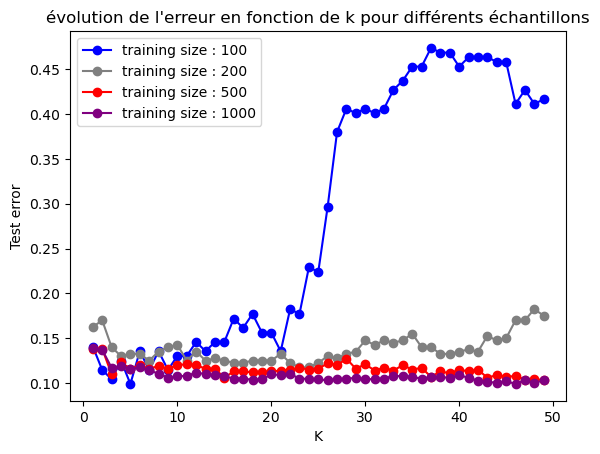

In [22]:
sigma = 0.1
min_error=[]

plt.figure(5)
n_samples = [100, 200, 500, 1000]
niter = len(n_samples)
# On appelle la fonction ErrorCurve
error_curve = tp_knn_source.ErrorCurve(k_range=range(1, 50, 1))
color = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black']
# On fait une boucle for pour generer les 4 echantillons pour differentes valeurs de n.
for n in range(niter):
    n1 = n2 = n_samples[n]
    X_train, Y_train = tp_knn_source.rand_checkers(n1, n2, sigma)
    X_test, Y_test = tp_knn_source.rand_checkers(n1, n2, sigma)
    error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
    error_curve.plot(color=color[n % len(color)], maketitle=False)
    plt.title("évolution de l'erreur en fonction de k pour différents échantillons")
    plt.legend(["training size : %d" % n for n in n_samples], loc='upper left')
    min_error.append(list(error_curve.errors).index(min(error_curve.errors)))

print(f"k optimal pour n = 100 : {min_error[0]}")
print(f"k optimal pour n = 200 : {min_error[1]}")
print(f"k optimal pour n = 500 : {min_error[2]}")
print(f"k optimal pour n = 1000 : {min_error[3]}")

On constate à première vue que la valeur optimale de l'hyperparamètre K dépend de la taille de l'échantillon choisi.
On voit que l'erreur de classification commise est trop grande pour n =100, c'est-à-dire quand l'échantillon est petit.
On constate que plus la taille de l'échantillon agrandit, plus l'erreur de classification commise baisse.
Donc, cela permet de dire que l'algorithme de K-NN nécessite un jeu de données important pour son entrainement et pour une meilleure performance.

**On fait une représentation graphique pour n=1000.**

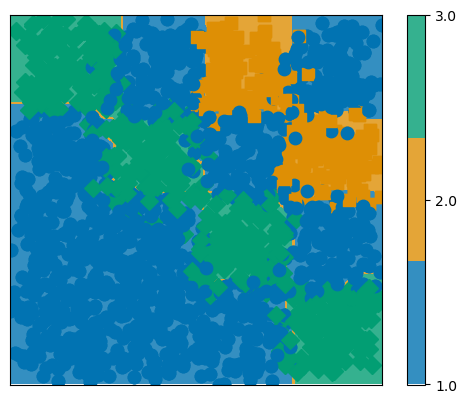

In [23]:
plt.figure(6)
tp_knn_source.plot_2d(X_train, Y_train)
n_neighbors = 28
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return knn.predict(xx.reshape(1, -1))
tp_knn_source.frontiere_new(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

## Question 11 : Avantages et Inconvénients du K-NN

La méthode des k-plus proches voisins (k-NN) est un algorithme d'apprentissage automatique simple mais puissant, utilisé pour la classification et la régression. Comme toute méthode, elle présente des avantages et des inconvénients.

**Avantages de k-NN :**

**Simplicité :** k-NN est très simple à implémenter et à comprendre. Il n'y a pas besoin de construire un modèle, de faire de l'inférence ou d'optimiser des paramètres une fois que le nombre de voisins k est défini.

**Non-paramétrique :** Comme k-NN ne fait aucune hypothèse sur la forme sous-jacente des données, il est utile dans les situations où la relation entre les caractéristiques et les étiquettes est complexe ou inconnue.

**Interprétabilité :** Les prédictions de k-NN sont faciles à interpréter puisqu'elles sont basées sur les étiquettes des voisins les plus proches.

**Adaptabilité :** k-NN peut être utilisé aussi bien pour la classification que pour la régression.

**Inconvénients de k-NN :**

**Temps de calcul :** k-NN peut être très lent lors de la prédiction, car il nécessite le calcul de la distance entre chaque point de données de test et tous les points de données d'entraînement.

**Passage à l'échelle :** k-NN ne passe pas bien à de grands ensembles de données. À mesure que la taille de l'ensemble de données augmente, le temps nécessaire pour calculer les distances augmente de manière linéaire, ce qui peut devenir impraticable.

**Mémoire :** k-NN nécessite de stocker l'ensemble des données d'entraînement pour faire des prédictions, ce qui peut être un problème avec de grandes quantités de données.

**Sensibilité au bruit :** k-NN peut être sensible au bruit et aux caractéristiques non pertinentes car toutes les caractéristiques contribuent de manière égale à la distance entre les points de données.

**Choix de k :** Le choix de k peut avoir un grand impact sur les performances. Un k trop petit peut conduire à un surajustement, tandis qu'un k trop grand peut mener à un sous-ajustement.

**Choix de la mesure de distance :** La performance de k-NN dépend fortement de la mesure de distance utilisée. Les distances couramment utilisées incluent la distance euclidienne, de Manhattan ou de Minkowski.

**Fléau de la dimensionnalité :** k-NN souffre du fléau de la dimensionnalité; sa performance se dégrade rapidement avec l'augmentation du nombre de dimensions en raison de la "malédiction de la dimensionnalité".

**Déséquilibre des classes :** k-NN peut être affecté par un déséquilibre des classes. Si une classe est plus fréquente qu'une autre, elle risque de dominer la prédiction.

## Question 12 : Base de donnée DIGITS 

**Importation du jeu de données DIGITS**

In [24]:
from sklearn.datasets import load_digits
from sklearn import datasets
digits = datasets.load_digits()

In [25]:
# Type de variables 
print(type(digits))

<class 'sklearn.utils._bunch.Bunch'>


In [26]:
# Afficher les clés disponibles dans l'objet
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [27]:
# Afficher le nombre total d'images
print(len(digits.data))

1797


In [28]:
# Première DONNEE : 64 valeurs, 8*8
print(digits['images'][0])
# digits['data'][0] : donne le même resultat.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [29]:
# Dimension de la base de donnée
print(digits.data.shape)

(1797, 64)


**Aperçu de 8 premières images**

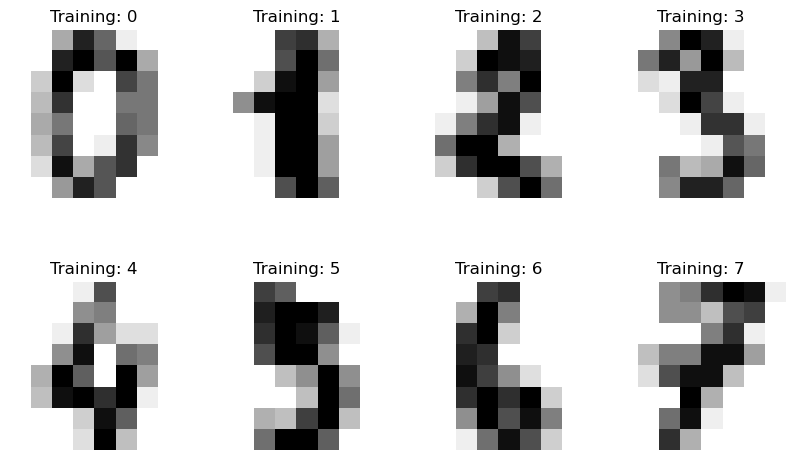

In [30]:
# Chargement du jeu de données 'digits'
digits = datasets.load_digits()

# Création de la figure avec 2 lignes et 4 colonnes de sous-graphiques
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

# Aplatir le tableau d'axes pour faciliter l'accès aux sous-graphiques
axes = axes.flatten()

# Affichage des 8 premières images et de leurs étiquettes
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")
plt.show()

**Base de données Train et Test**

On subdivise la base de donnée en deux proportion égale (50% chacun), une partie pour l'apprentissage et la deuxième pour le test.

In [31]:
n_samples = len(digits.data)

# Donnée train
X_train_digits = digits.data[:n_samples // 2]
Y_train_digits = digits.target[:n_samples // 2]

# Donnée test
X_test_digits = digits.data[n_samples // 2:]
Y_test_digits = digits.target[n_samples // 2:]

**Histogramme : proportion de différentes classes**

Nous avons en tout 10 classes (de 0 à 9) et d'après le graphqique ci-dessous, elles ont presque toutes la même proportion (10%).

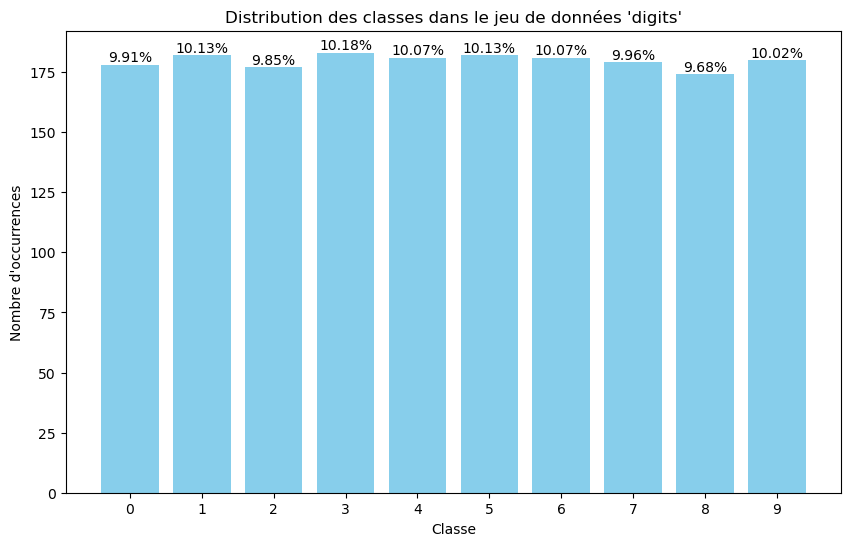

In [32]:
target = pd.DataFrame(digits.target)
 
# Calcul des comptages de chaque classe
value_counts = target[0].value_counts().sort_index()

# Calcul des pourcentages pour chaque classe
percentages = (value_counts / value_counts.sum()) * 100

# Création du graphique en barres
plt.figure(figsize=(10, 6))  # Définit la taille de la figure
bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Ajout des titres et des étiquettes
plt.title('Distribution des classes dans le jeu de données \'digits\'')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')

# Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.xticks(range(10))

# Ajout des pourcentages sur les barres
for bar, percentage in zip(bars, percentages):
    # on recupere la hauteur de la barre
    yval = bar.get_height()
    # on ecrit le texte (le pourcentage) sur l'en-tête de la barre
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

# Affichage du graphique
plt.show()


**K-NN : on entraine ce modèle sur les données train digits**

In [33]:
n_neighbors = 30
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_digits, Y_train_digits)
Y_pred = knn.predict(X_test_digits)

In [34]:
score_train = knn.score(X_train_digits, Y_train_digits)
score_test = knn.score(X_test_digits, Y_test_digits)
print("Le taux d'erreur sur les données train :", 1 - score_train)
print("Le score d'erreur sur les données test :", 1 - score_test)

Le taux d'erreur sur les données train : 0.03897550111358572
Le score d'erreur sur les données test : 0.07452725250278092


## Question 13 : Matrice de confusion

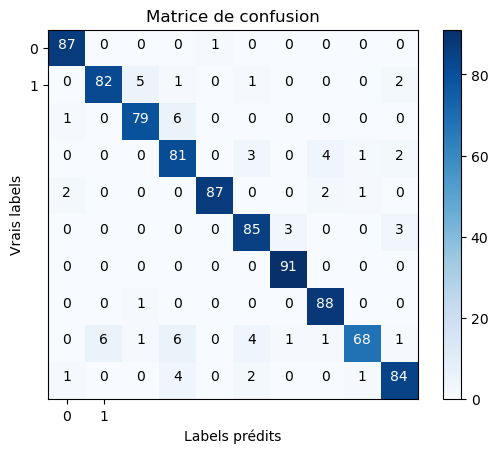

In [35]:
matrice_de_confusion = metrics.confusion_matrix(Y_test_digits, Y_pred)

classes = range(0,2)
plt.figure()

plt.imshow(matrice_de_confusion, interpolation='nearest', cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrice_de_confusion.shape[0]), range(matrice_de_confusion.shape[1])):
    plt.text(j, i, matrice_de_confusion[i, j],
             horizontalalignment="center",
             color="white" if matrice_de_confusion[i, j] > ( matrice_de_confusion.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

## Question 14

On cherche le "k" optimal. On fait appel à la classe "LOOCurve" du fichier "tp_knn_source". Cette classe nous permet de SELECTIONNER la VALEUR OPTIMALE de l'hyperparamètre k. On visualiser la performanace de validation croisée LOO pour chaque valeurs de k. La valeur optimale de k nous permet naturellement d'obtenir une meilleure précision dans la prédiction.

In [36]:
# Différentes valeurs de k
k = list(range(1, 50, 5)) + list(range(100, 300, 100))

La valeur optimale de k est: 1 avec un score égal à : 0.995
Les différents scores obtenus sont : [0.995 0.995 0.98  0.98  0.985 0.975 0.965 0.96  0.965 0.96  0.93  0.915]


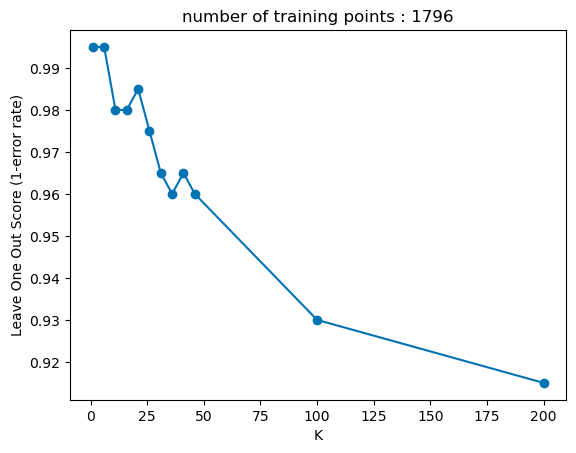

In [37]:
loo_curve = tp_knn_source.LOOCurve(k_range=k)
loo_curve.fit_curve(X=digits.data, y=digits.target)
print(f"La valeur optimale de k est: {loo_curve.best_k} avec un score égal à : {loo_curve.cv_scores[loo_curve.best_index]}")
print("Les différents scores obtenus sont :", loo_curve.cv_scores)
plt.figure(9)
loo_curve.plot()

On obtient que la valeur optimale de k est égale à 1 avec un taux de score de 99,5%.

# II. Linear Discriminant Analysis

## Aspect théorique

On note par $|\boldsymbol{\Sigma}|$ le determinant de la matrice $\Sigma$. Soit $f(x)$ la densité p-dimensionnelle de la loi $N_{p}(\mu, \Sigma)$

$$
\begin{equation}
f(x) = \frac{1}{(2\pi)^{\frac{p}{2}} |\boldsymbol{\Sigma}|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x-\mu)^T \boldsymbol{\Sigma}^{-1} (x-\mu) \right)
\end{equation}
$$

## Question 15

Exprimer $
\begin{equation}
P(Y=+1|X=x)
\end{equation}
$
 et 
$
\begin{equation}
P(Y=-1|X=x)
\end{equation}
$ 
en fonction $f_{+}$, $f_{-}$ et $\pi_{+}$.

**Cas 1** : $P(Y=+1|X=x) = ? $

Rappel de **la formule de Bayes** : $$ P(A|B)= \frac{P(A\cap B)}{P(B)} \ \ \text{donc}, 
P(A\cap B) =  P(A|B) \times P(B)$$

Grâce à ces deux formules, on écrit :


$$
\begin{align*}
P(Y = +1|X = x) &= \frac{P(X = x \cap Y = +1)}{P(X = x)} \\
P(Y = +1|X = x) &= \frac{P(X = x|Y = +1)P(Y = +1)}{P(X = x)}
\end{align*}
$$
Or, d'après **la  formule de probabilité totale**, on a :


$$
P(X = x) = P(X = x|Y = +1)P(Y = +1) + P(X = x|Y = -1)P(Y = -1)
$$

$$P(X = x) = f_{+}\pi_{+} + f_{-}(1 - \pi_{+}) $$


Donc, en remplaçant $P(X = x)$ par son expression, on obtient :

$$
\color{red}{P(Y = +1|X = x) = \frac{{f_{+}\pi_{+}}}{{f_{+}\pi_{+}} + f_{-}(1 - \pi_{+})}}
$$



**Cas 2** : $P(Y=-1|X=x) = ? $



$$
\begin{align*}
P(Y = -1|X = x) &= \frac{P(X = x \cap Y = -1)}{P(X = x)} \\
P(Y = -1|X = x) &= \frac{P(X = x|Y = -1)P(Y = -1)}{P(X = x)}
\end{align*}
$$

$$
\color{red}{P(Y = -1|X = x) = \frac{f_{-}(1 - \pi_{+})}{f_{+}\pi_{+} + f_{-}(1 - \pi_{+})}}
$$

## Question 16 : Log-ratios

Exprimer les log-ratios de deux classes.

On rappelle les deux densités :\
$$
\begin{equation}
f_{+}(x) = \frac{1}{(2\pi)^{\frac{p}{2}} |\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x-\mu_{+})^T \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) \right)
\end{equation}
$$
\
$$
\begin{equation}
f_{-}(x) = \frac{1}{(2\pi)^{\frac{p}{2}} |\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x-\mu_{-})^T \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \right)
\end{equation}
$$

D'après la question précédente :

$$
P(Y=+1|X=x) = \frac{\pi_{+} f_{+}(x) }{\pi_{+} f_{+}(x) + (1 - \pi_{+}) f_{-}(x)}          
$$

$$
P(Y=-1|X=x) = \frac{(1 - \pi_{+}) f_{-}(x) }{\pi_{+} f_{+}(x) + (1 - \pi_{+}) f_{-}(x)}          
$$

On divise les deux expressions :


$$
\frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} = \frac{\pi_{+} f_{+}(x) }{\pi_{+} f_{+}(x) + (1 - \pi_{+}) f_{-}(x)} \times \frac{\pi_{+} f_{+}(x) + (1 - \pi_{+}) f_{-}(x)}{\pi_{-} f_{-}(x)} 
=  \frac{\pi_{+} f_{+}(x)}{\pi_{-} f_{-}(x)}
$$


On passe le log à l'expression précédente :


$$
\begin{align*}
\log \left ( \frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} \right) 
 &= \log \left ( \frac{\pi_{+} f_{+}(x)}{\pi_{-} f_{-}(x)} \right) \\
\log \left ( \frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} \right) &= \log \left ( \frac{\pi_{+}}{\pi_{-}} \times \frac{f_{+}(x)}{f_{-}(x)} \right) \\
\log \left ( \frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} \right) &=  \log \left ( \frac{\pi_{+}}{\pi_{-}} \right) 
+ \log \left ( \frac{f_{+}(x)}{f_{-}(x)} \right) \ \ (*)
\end{align*}
$$

Pour calculer $\log \left ( \frac{f_{+}(x)}{f_{-}(x)} \right)$, nous calculons d'abord : 
$
\frac{f_{+}(x)}{f_{-}(x)}
$


$$
\begin{align*}
\frac{f_{+}(x)}{f_{-}(x)} &= \frac{\frac{1}{(2\pi)^{\frac{p}{2}} |\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x-\mu_{+})^T \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) \right)}{\frac{1}{(2\pi)^{\frac{p}{2}} |\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x-\mu_{-})^T \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \right)} \\
\frac{f_{+}(x)}{f_{-}(x)} &=  \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \times
\frac{\exp \left(-\frac{1}{2} (x-\mu_{+})^T \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) \right)}{\exp \left(-\frac{1}{2} (x-\mu_{-})^T \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \right)}
\end{align*}
$$
On passe le log à l'expression :

$$
\begin{align*}
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log \left ( \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \right) + \log \left( \frac{\exp \left(-\frac{1}{2} (x-\mu_{+})^T \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) \right)}{\exp \left(-\frac{1}{2} (x-\mu_{-})^T \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \right)} \right) \\
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log \left ( \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \right) -\frac{1}{2} (x-\mu_{+})^T \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) + \frac{1}{2} (x-\mu_{-})^T \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \\
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log \left ( \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \right) -\frac{1}{2} (x^T-\mu_{+}^T) \boldsymbol{\Sigma}_{+}^{-1} (x-\mu_{+}) + \frac{1}{2} (x^T -\mu_{-}^T) \boldsymbol{\Sigma}_{-}^{-1} (x-\mu_{-}) \\
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log \left ( \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \right) - \frac{1}{2} \left( x^T\boldsymbol{\Sigma}_{+}^{-1}x - x^T\boldsymbol{\Sigma}_{+}^{-1} \mu_{+} - 
\mu_{+}^T \boldsymbol{\Sigma}_{+}^{-1}x + \mu_{+}^T \boldsymbol{\Sigma}_{+}^{-1} \mu_{+} \right) + \frac{1}{2} \left(
x^T\boldsymbol{\Sigma}_{-}^{-1}x - x^T\boldsymbol{\Sigma}_{-}^{-1} \mu_{-} - 
\mu_{-}^T \boldsymbol{\Sigma}_{-}^{-1}x + \mu_{-}^T \boldsymbol{\Sigma}_{-}^{-1} \mu_{-}
\right)
\end{align*}
$$

Or, on sait que $$ \boldsymbol{\Sigma}_{-} = \boldsymbol{\Sigma}_{+} = \boldsymbol{\Sigma}$$ 
Donc, 

$$
\begin{align*}
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log \left( \frac{|\boldsymbol{\Sigma}_{+}|^{\frac{1}{2}}}{|\boldsymbol{\Sigma}_{-}|^{\frac{1}{2}}} \right) - \frac{1}{2} \left( x^T\boldsymbol{\Sigma}_{-}^{-1}x - x^T\boldsymbol{\Sigma}_{-}^{-1} \mu_{+} - \mu_{+}^T \boldsymbol{\Sigma}_{-}^{-1}x + \mu_{+}^T \boldsymbol{\Sigma}_{-}^{-1} \mu_{+} \right) \\
&\quad + \frac{1}{2} \left(x^T\boldsymbol{\Sigma}_{+}^{-1}x - x^T\boldsymbol{\Sigma}_{+}^{-1} \mu_{-} - \mu_{-}^T \boldsymbol{\Sigma}_{+}^{-1}x + \mu_{-}^T \boldsymbol{\Sigma}_{+}^{-1} \mu_{-} \right) \\
\log \frac{f_{+}(x)}{f_{-}(x)} &= \log(1) + x^T \boldsymbol{\Sigma}^{-1}(\mu_{+} - \mu_{-}) + \frac{1}{2} \mu_{-}^T \boldsymbol{\Sigma}^{-1} \mu_{-} - \frac{1}{2} \mu_{+}^T \boldsymbol{\Sigma}^{-1} \mu_{+} \\
\log \frac{f_{+}(x)}{f_{-}(x)} &= x^T \boldsymbol{\Sigma}^{-1}(\mu_{+} - \mu_{-}) 
- \frac{1}{2} \left( \underbrace{\mu_{+}^T \boldsymbol{\Sigma}^{-1} \mu_{+} - \mu_{-}^T \boldsymbol{\Sigma}^{-1} \mu_{-}} \right)
\end{align*}
$$

On factorise cette expression : $ \mu_{+}^T \boldsymbol{\Sigma}^{-1} \mu_{+} - \mu_{-}^T \boldsymbol{\Sigma}^{-1} \mu_{-}$


$
\mu_{+}^T \boldsymbol{\Sigma}^{-1} \mu_{+} - \mu_{-}^T \boldsymbol{\Sigma}^{-1} \mu_{-} = (\mu_{+} - \mu_{-})^T \boldsymbol{\Sigma}^{-1} (\mu_{+} - \mu_{-}) \ \text{car} \
-\mu_{+}^T \boldsymbol{\Sigma}^{-1} \mu_{-} + \mu_{-}^T \boldsymbol{\Sigma}^{-1} \mu_{+} = 0
$


$$
\color{red}{ 
\log \frac{f_{+}(x)}{f_{-}(x)} = x^T \boldsymbol{\Sigma}^{-1}(\mu_{+} - \mu_{-}) - \frac{1}{2} (\mu_{+} - \mu_{-})^T \boldsymbol{\Sigma}^{-1} (\mu_{+} - \mu_{-})}
$$

On remplace $\log \frac{f_{+}(x)}{f_{-}(x)}$ par son expression dans l'équation $(*)$ et on obtient le résultat ci-dessous :

$$
\color{red}{
\log \left ( \frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} \right)  = \log \left ( \frac{\pi_{+}}{1 - \pi_{+}} \right) + x^T \boldsymbol{\Sigma}^{-1}(\mu_{+} - \mu_{-}) - \frac{1}{2} (\mu_{+} - \mu_{-})^T \boldsymbol{\Sigma}^{-1} (\mu_{+} - \mu_{-})
}
$$


### Question 17 : Justifier le choix du classifieur

Pour classifier une nouvelle observation, on compare $\pi_{+} f_{+}(x) $ et  $\pi_{-} f_{-}(x)$.

Elle est labelisée $1$ si :


$$
\begin{align*}
\frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} &> 1 \\ 
\log \left ( \frac{P(Y=+1|X=x)}{P(Y=-1|X=x)} \right) &> 0 \\
\log \left( \frac{\pi_{+}}{1 - \pi_{+}} \right) + x^T \Sigma^{-1} (\mu_{+} - \mu_{-}) - \frac{1}{2} (\mu_{+} - \mu_{-})^T \Sigma^{-1} (\mu_{+} - \mu_{-}) &> 0  \\
x^T \Sigma^{-1} (\mu_{+} - \mu_{-}) &> \frac{1}{2} (\mu_{+} - \mu_{-})^T \Sigma^{-1} (\mu_{+} - \mu) - \log \left( \frac{\pi_{+}}{1 - \pi_{+}} \right) \\
x^T \Sigma^{-1} (\mu_{+} - \mu_{-}) &> \frac{1}{2} (\mu_{+} - \mu_{-})^T \Sigma^{-1} (\mu_{+} - \mu) - \log (\pi_{+}) - \log (1 - \pi_{+})
\end{align*}
$$

Donc, le classifieur est :

$$
\color{red}{
\left\{
    \begin{array}{rl}
        1 & \mbox{si } \ x^T \Sigma^{-1} (\mu_{+} - \mu_{-}) > \frac{1}{2} (\mu_{+} - \mu_{-})^T \Sigma^{-1} (\mu_{+} - \mu_{-}) - \log \left( \frac{m}{n} \right) - \log \left( 1 - \frac{m}{n} \right) \\
        -1 & \mbox{sinon.}
    \end{array}
\right.
}
$$

### Question 18 : Implémentation d'une classe 'LDAClassifier'

In [38]:
class LDAClassifier(BaseEstimator, ClassifierMixin):
    """ Home made LDA Classifier class"""
    def fit(self, X, y):
        n_, d_ = X.shape
        X_ = X[y.argsort(),:]
        y_ = np.sort(y)
        counts_ = np.unique(y, return_counts=True)
        iSecond_ = counts_[1][0] # start of second class
        mNeg_ = np.mean(X_[range(0,iSecond_),:], axis=0)
        mPos_ = np.mean(X_[range(iSecond_,n_),:], axis=0)
        cov_ = (np.cov(X_[range(0,iSecond_),:].T) * (iSecond_ - 1) + np.cov(X_[range(iSecond_,n_),:].T) * (n_ - iSecond_ - 1)) / (n_ - 2)
        # Calculate multipliers
        self.preMul1_ = np.linalg.inv(cov_)@(mPos_ - mNeg_)
        self.preMul2_ = 0.5*mPos_.T@np.linalg.inv(cov_)@mPos_ - 0.5*mNeg_.T@np.linalg.inv(cov_)@mNeg_ + np.log(iSecond_ / n_) - np.log(1. - iSecond_ / n_)
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        return (np.round(X@self.preMul1_ > self.preMul2_)*2 - 1).astype(int)

### Question 19

**Génération des données et split**

The result coincides in 1000 cases out of 1000.
Factory error rate: 8.60%.
Homemade error rate: 8.60%.


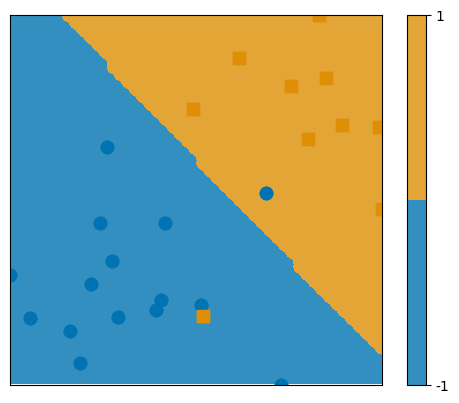

In [39]:
# Generate additional train and test data
X1, y1 = tp_knn_source.rand_bi_gauss(10, 15, [1,1], [-1,-1], [0.9, 0.9], [0.9, 0.9])
X1_train = X1
Y1_train = y1

X1,y1 = tp_knn_source.rand_bi_gauss(500, 500, [1,1], [-1,-1], [0.9, 0.9], [0.9, 0.9])
X1_test = X1
Y1_test = y1

# Check the performance and compare with the scikit-learn implementation
clfMy = LDAClassifier()
clfMy.fit(X1_train, Y1_train)
y_predMy = clfMy.predict(X1_test)


clf = LinearDiscriminantAnalysis()
clf.fit(X1_train, Y1_train)
y_pred = clf.predict(X1_test)
print('The result coincides in {} cases out of {}.'.format((y_predMy == y_pred).sum(), Y1_test.shape[0]))
print('Factory error rate: {:2.2%}.'.format((y_pred != Y1_test).mean()))
print('Homemade error rate: {:2.2%}.'.format((y_predMy != Y1_test).mean()))

# Visualise the separation rule
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clfMy.predict(xx.reshape(1, -1))
plt.figure(10)
tp_knn_source.plot_2d(X1_train, Y1_train)
tp_knn_source.frontiere_new(f, X1_train, Y1_train, w=None, step=50, alpha_choice=1)

### Question 20 : Règle de décision avec LDAClassifier

In [40]:
X3, y3 = tp_knn_source.rand_clown(n1=10, n2=15, sigma1=1, sigma2=5)
X3_train = X3
Y3_train = y3

X3, y3 = tp_knn_source.rand_clown(n1=100, n2=100, sigma1=1, sigma2=5)
X3_test = X3
Y3_test = y3

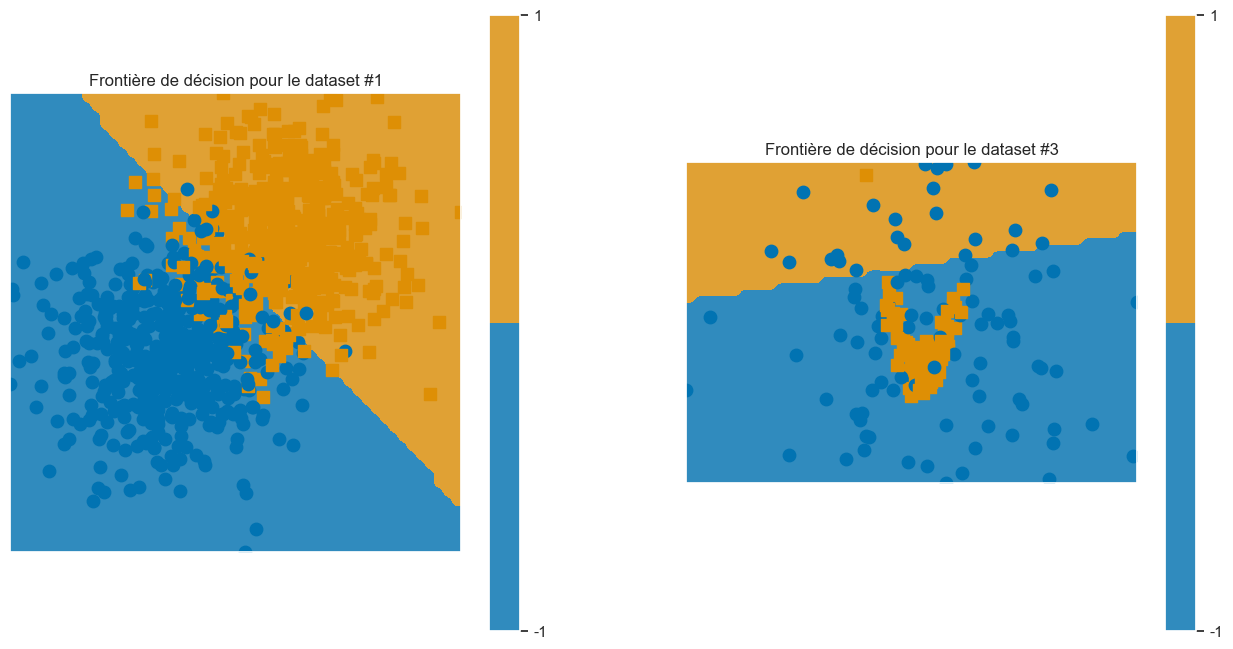

In [41]:
myLDAClassifier_1 = LDAClassifier()
myLDAClassifier_3 = LDAClassifier()

myLDAClassifier_1.fit(X1_train, Y1_train)
myLDAClassifier_3.fit(X3_train, Y3_train)

sns.set()

# Création de la figure et des sous-graphes
plt.figure(figsize=(16, 8))

# Premier sous-graphe
plt.subplot(1, 2, 1)
plt.title("Frontière de décision pour le dataset #1")
tp_knn_source.frontiere_new(lambda x: myLDAClassifier_1.predict(x.reshape(1, -1)), X1_test, Y1_test)

# Deuxième sous-graphe
plt.subplot(1, 2, 2)
plt.title("Frontière de décision pour le dataset #3")
tp_knn_source.frontiere_new(lambda x: myLDAClassifier_3.predict(x.reshape(1, -1)), X3_test, Y3_test)

plt.show()

L'analyse discrimante linéaire est performante lorsque les données sont linéairement séparables. Par exemple le jeu de données #1 qui est construit sur 2 distributions gaussiennes bivariées. Contrairement au dataset #3 basé sur la distribution rand_Clown  en forme de sourire de clown. On remarque des valeurs très concentrées et positve au centre avec une faible variance. De nombreuses données sont mal classifiées.

# III. Régression Logistique

### Question 21

**Données équilibrées**

In [42]:
# création d'un jeu de données avec les classes équilibrées
X_1, y_1 = tp_knn_source.rand_bi_gauss(n1= 100, n2= 10, mu1= [1., 1.], mu2= [-1., -1.], 
                                       sigmas1= [0.9, 0.9], sigmas2= [0.9, 0.9])
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X_1, y_1, test_size=0.8, random_state = 42)

# classification avec LDA du jeu équilibré
lr = linear_model.LogisticRegression(solver='liblinear')
lr.fit(X1_train, y1_train)
lr_score_=lr.score(X1_test, y1_test)

# classification avec regression logistique du jeu équilibré
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X1_train, y1_train)
lda_score_=clf_LDA.score(X1_test, y1_test)

#résultat pour classes équilibrées
print("sur le jeu de donnée rand_bi_gauss avec classes équilibrées: ")
print(f" - Le score d'une analyse discriminante linéaire est de {lda_score_} ")
print(f" - Le score d'une régression linéaire est de {lr_score_} ")

sur le jeu de donnée rand_bi_gauss avec classes équilibrées: 
 - Le score d'une analyse discriminante linéaire est de 0.9659090909090909 
 - Le score d'une régression linéaire est de 0.9659090909090909 


**Données déséquilibrées**

In [43]:
# création d'un jeu de données avec les classes déséquilibrées
X_1_unequi, y_1_unequi = tp_knn_source.rand_bi_gauss(n1= 50, n2=1000, 
                                                     mu1= [1., 1.], mu2=[-1., -1.], 
                                                     sigmas1= [0.9, 0.9], sigmas2= [0.9, 0.9])

X1_train_un, X1_test_un, y1_train_un, y1_test_un = model_selection.train_test_split(X_1_unequi, y_1_unequi, test_size=0.8, random_state = 42)

lr_unequi = linear_model.LogisticRegression(solver='liblinear')
lr_unequi.fit(X1_train_un, y1_train_un)
lr_unequi_score_=lr_unequi.score(X1_test_un, y1_test_un)

clf_LDA_unequi = LinearDiscriminantAnalysis()
clf_LDA_unequi.fit(X1_train_un, y1_train_un)
lda_unequi_score_=clf_LDA_unequi.score(X1_test_un, y1_test_un)

#résultat pour classes déséquilibrées
print("Sur le jeu de donnée rand_bi_gauss avec classes déséquilibrées: ")
print(f" - Le score d'une analyse discriminante linéaire est de {lda_unequi_score_}" )
print(f" - Le score d'une régression logistique est de {lr_unequi_score_} ")

Sur le jeu de donnée rand_bi_gauss avec classes déséquilibrées: 
 - Le score d'une analyse discriminante linéaire est de 0.9821428571428571
 - Le score d'une régression logistique est de 0.9797619047619047 


 Les performances sont similaires quel que soit le jeu de données équilibré ou déséquilibré. Egalement, les résultats sont identiques quel que soit le classifier LinearDiscriminantAnalysis() ou LogisticRegression().

### Question 22 : coef_ et intercept_ du modèle

In [44]:
coef = lr.coef_
intercept = lr.intercept_

print(f"vecteur normal : {coef}")
print(f"intercept : {intercept}")
print("Ils donnent l'équation d'un hyperplan séparateur dans R2 représentable comme une fonction linéaire avec ordonnée à l'origine "\
      + str(round(intercept[0], 2)) + " et pente " + str(round(- lr.coef_[0][0] / lr.coef_[0][1], 2)) + ".")

vecteur normal : [[1.19879306 0.78682482]]
intercept : [0.97989744]
Ils donnent l'équation d'un hyperplan séparateur dans R2 représentable comme une fonction linéaire avec ordonnée à l'origine 0.98 et pente -1.52.


La variable coef_ correspond au vecteur normal à la frontière de décision, l'intercept_ à l'ordonnée à l'origine de cette même frontière.
Ces coefficients permettent d'établir l'équation d'un hyperplan séparateur dans $R^2$ représentable comme une fonction linéaire avec ordonnée à l'origine -0.14 et de pente 0.81.
Ces coefficients peuvent s'interpréter comme l'équation d'un hyperplan séparateur de données dans $R^2$

### Question 23 : Frontière de décision

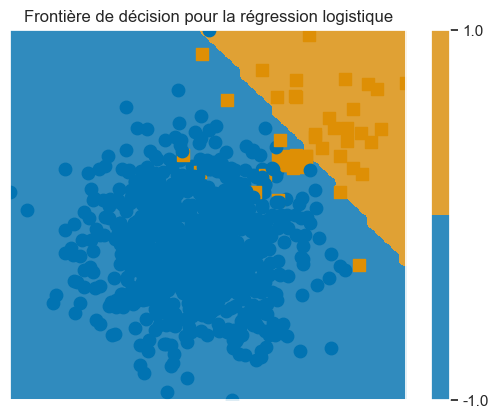

In [45]:
plt.title("Frontière de décision pour la régression logistique")
tp_knn_source.frontiere_new(lambda x: lr_unequi.predict(x.reshape(1,-1)), X1_test_un, y1_test_un)

Ce graphique confirment les conclusions précédentes. la frontrière est indentique même si les données sont déséquilibrées

### Question 24

**Donnée digits**

In [46]:
# Téléchargement de la base digits 
digits = datasets.load_digits()

# Echantillon de la base digits en données d'apprentissage et de test
X_train = digits.data[::2]
y_train = digits.target[::2]
X_test = digits.data[1::2]
y_test = digits.target[1::2]

# apprentissage du modèle LogisticRegression()
lr = linear_model.LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
error_rate = 1 - lr.score(X_test, y_test)

# affichage
print("Le taux d'erreur sur l'échantillon test est de " + str(round(100 * error_rate, 2)) + "%.")

Le taux d'erreur sur l'échantillon test est de 6.01%.


                                                     **Fin : Merci pour l'appui en salle de TP**